In [1]:
import scipy.stats as sps
import matplotlib.pyplot as plt
import numpy as np
import math as math

%pylab inline

Populating the interactive namespace from numpy and matplotlib


Создаём список оценок
$$\hat{\theta}_0 = (1!/\overline{X})^{1}$$
$$\ldots$$
$$\hat{\theta}_{19} = \left(20!/\overline{X^{20}}\right)^{1/20}$$

In [39]:
class Estimator:
    def __init__(self, function, tex_description):
        self.function = function
        self.tex_description = tex_description
        
class E(Estimator):
    def __init__(self, k):
        Estimator.__init__(
            self,
            lambda sample:
                math.pow(math.factorial(k) / np.power(sample, k).mean(), 1/k),
            r"$(" + str(k) + r"!/\overline{X^{" + str(k) + r"}})^{1/" + str(k) + r"}$")
        
theta_cup = [E(i) for i in range(1, 21)]

Пишем функцию, которая по выборке $sample$, истинному значению параметра $theta$ и списку оценок $estimators$ строит график высоты $plot\_height$, на котором изображён модуль разности между истинным значением параметра и его оценкой для каждого префикса выборки $sample$ (да, точно такая же, как у меня написана для задачи 2.1, только подпись к графику в другом месте).

In [29]:
def gen_prefixes(some_list):
    prefixes = []
    for i in range(1, len(some_list) + 1):
        prefixes.append(some_list[0:i])
    return prefixes

def normalize(values, teta):
    return list(map(lambda x: abs(x - teta), values))

def draw_plot(sample, theta, estimators, plot_height):
    sample_prefixes = gen_prefixes(sample)
    plt.figure(figsize=(12, 5)).suptitle("theta = " + str(theta), fontsize=14)
    plt.axis([0, len(sample), 0, plot_height])
    plt.rc('text', usetex=True)
    
    for estimator in estimators:
        plt.plot(normalize(map(estimator.function, sample_prefixes), theta),
                 label=estimator.tex_description)
        
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.show()

Генерируем выборку. Все графики построены на одной выборке, чтобы сравнение было корректным.

In [25]:
N = 10000
theta = 1
sample = sps.expon.rvs(size=N)

На графиках отражаем по пять оценок. Если больше, то их слишком много, разных цветов не хватает, получается мешанина.

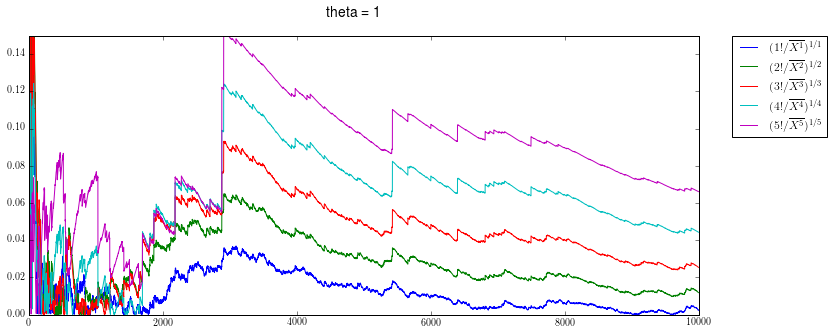

In [40]:
plot_height = 0.15
draw_plot(sample, theta, theta_cup[0:5], plot_height)

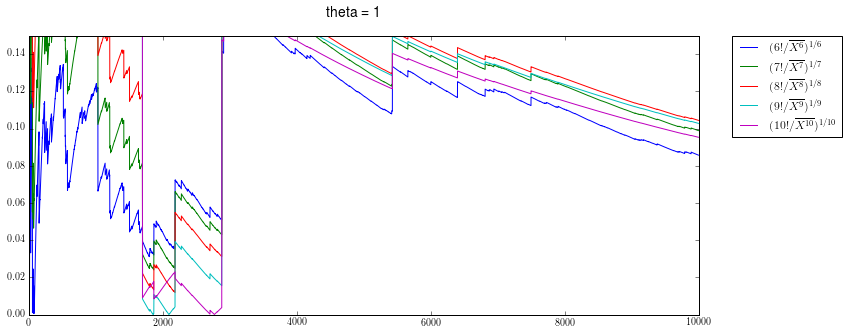

In [41]:
draw_plot(sample, theta, theta_cup[5:10], plot_height)

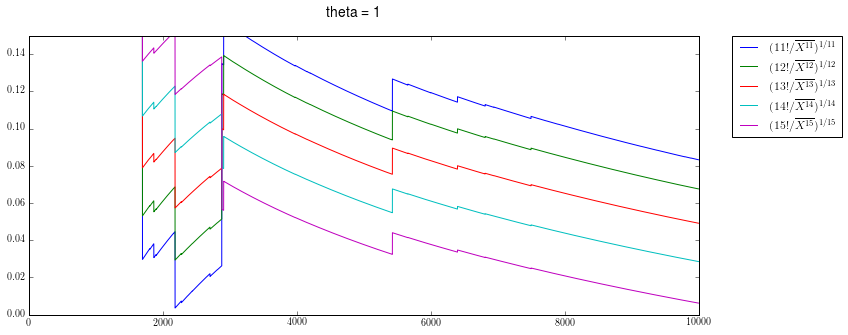

In [42]:
draw_plot(sample, theta, theta_cup[10:15], plot_height)

Как красиво оценки на графике со $k$ от 11 до 15 поменялись местами. Сначала было «чем выше степень, тем лучше оценка», а после скачка порядок поменялся на противоположный.

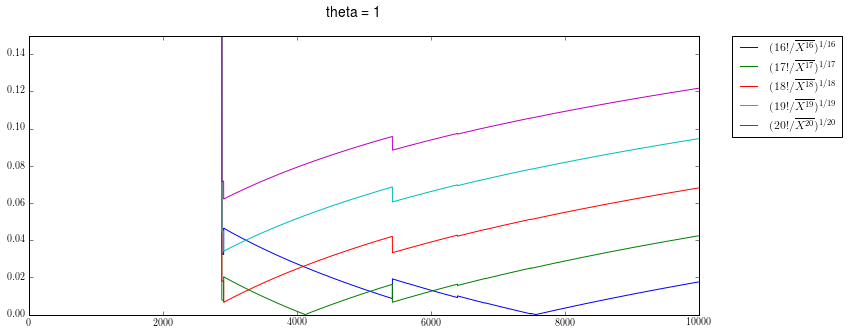

In [43]:
draw_plot(sample, theta, theta_cup[15:20], plot_height)

Видно, что лучше всех себя ведёт оценка с $k = 1$. А чем больше $k$, тем сильнее оценка «скачет».